In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

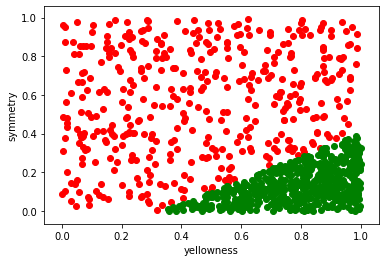

In [2]:
%matplotlib inline
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [6]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        
        return input_matrix.dot(self.w) + self.b > 0
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """

        y2 = example.T.dot(self.w) + self.b > 0
        err = y - y2
        self.w += example * err
        self.b += err
        return err

In [7]:
def create_perceptron(m):
    """Создаём перцептрон со случайными весами и m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [8]:
def test_v_f_p(n, m):
    """
    Расчитывает для перцептрона с m входами
    с помощью методов forward_pass и vectorized_forward_pass
    n ответов перцептрона на случайных данных.
    Возвращает время, затраченное vectorized_forward_pass и forward_pass
    на эти расчёты.
    """
    
    p = create_perceptron(m)
    input_m = np.random.random_sample((n, m))
    
    start = time.process_time()
    vec = p.vectorized_forward_pass(input_m)
    end = time.process_time()
    vector_time = end - start
    
    start = time.process_time()
    for i in range(0, n):
        p.forward_pass(input_m[i]) 
    end = time.process_time()
    plain_time = end - start

    return [vector_time, plain_time]

In [9]:
def mean_execution_time(n, m, trials=100):
    """среднее время выполнения forward_pass и vectorized_forward_pass за trials испытаний"""
    
    return np.array([test_v_f_p(m, n) for _ in range(trials)]).mean(axis=0)

def plot_mean_execution_time(n, m):
    """рисует графики среднего времени выполнения forward_pass и vectorized_forward_pass"""
    
    mean_vectorized, mean_plain = mean_execution_time(int(n), int(m))
    p1 = plt.bar([0], mean_vectorized,  color='g')
    p2 = plt.bar([1], mean_plain, color='r')

    plt.ylabel("Time spent")
    plt.yticks(np.arange(0, mean_plain))

    plt.xticks(range(0,1))
    plt.legend(("vectorized","non - vectorized"))

    plt.show()

interact(plot_mean_execution_time, 
            n=RadioButtons(options=["1", "10", "100"]),
            m=RadioButtons(options=["1", "10", "100"], separator=" "));

interactive(children=(RadioButtons(description='n', options=('1', '10', '100'), value='1'), RadioButtons(descr…